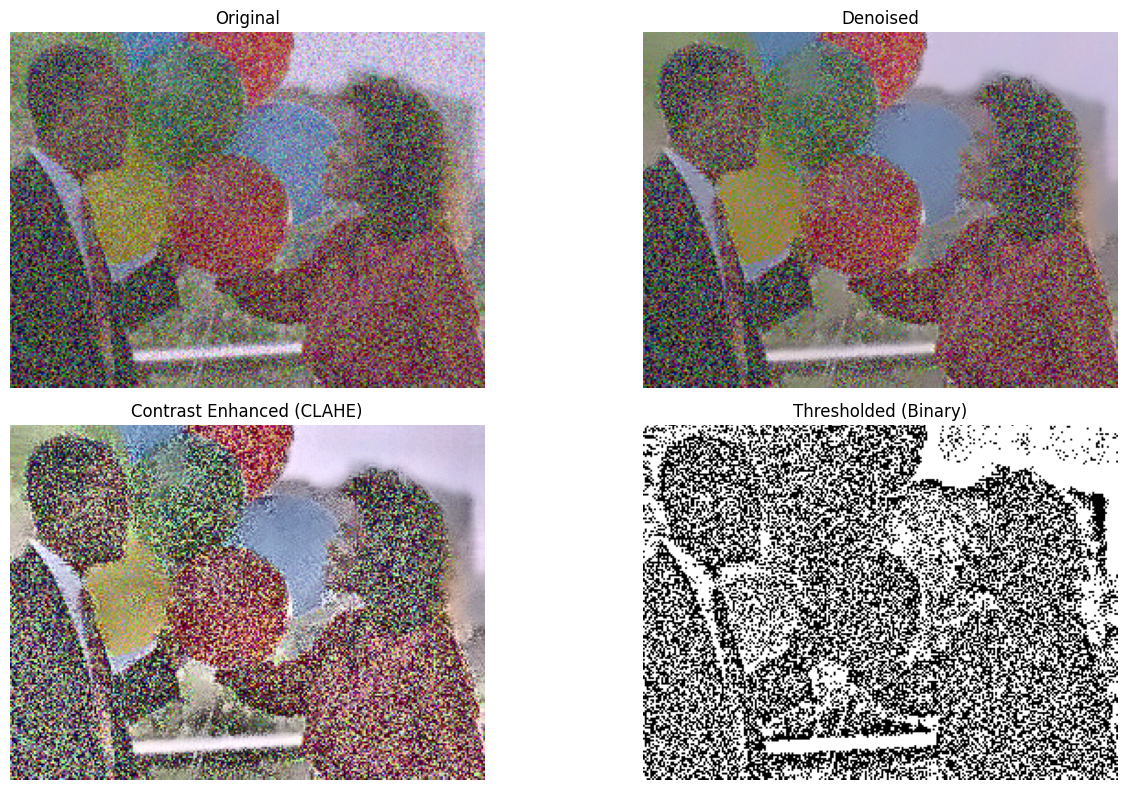

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1. LOAD IMAGE
# -------------------------
img_path = "/content/noisy_image_sample.jpg"  # Change to your filename
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError("Image not found. Check img_path.")

# Convert BGR (OpenCV default) → RGB (matplotlib format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# -------------------------
# 2. DENOISING
# -------------------------
denoised = cv2.fastNlMeansDenoisingColored(
    img, None,
    h=10,              # strength for luminance denoising
    hColor=10,         # strength for color denoising
    templateWindowSize=7,
    searchWindowSize=21
)
denoised_rgb = cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB)

# -------------------------
# 3. CONTRAST ENHANCEMENT (CLAHE)
# -------------------------
lab = cv2.cvtColor(denoised, cv2.COLOR_BGR2LAB)

# Split LAB image into 3 channels (L: lightness, A/B: color)
l, a, b = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
cl = clahe.apply(l)

# Merge corrected L channel back with original A and B
enhanced_lab = cv2.merge((cl, a, b))
enhanced = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)
enhanced_rgb = cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)

# -------------------------
# 4. THRESHOLDING
# -------------------------
gray = cv2.cvtColor(enhanced, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    blockSize=21,
    C=5
)

# -------------------------
# 5. SAVE PROCESSED IMAGES (optional)
# -------------------------
cv2.imwrite("/content/processed_denoised.jpg", denoised)
cv2.imwrite("/content/processed_enhanced.jpg", enhanced)
cv2.imwrite("/content/processed_thresholded.jpg", thresh)

# -------------------------
# 6. DISPLAY RESULTS SIDE-BY-SIDE
# -------------------------
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Denoised")
plt.imshow(denoised_rgb)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Contrast Enhanced (CLAHE)")
plt.imshow(enhanced_rgb)
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Thresholded (Binary)")
plt.imshow(thresh, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


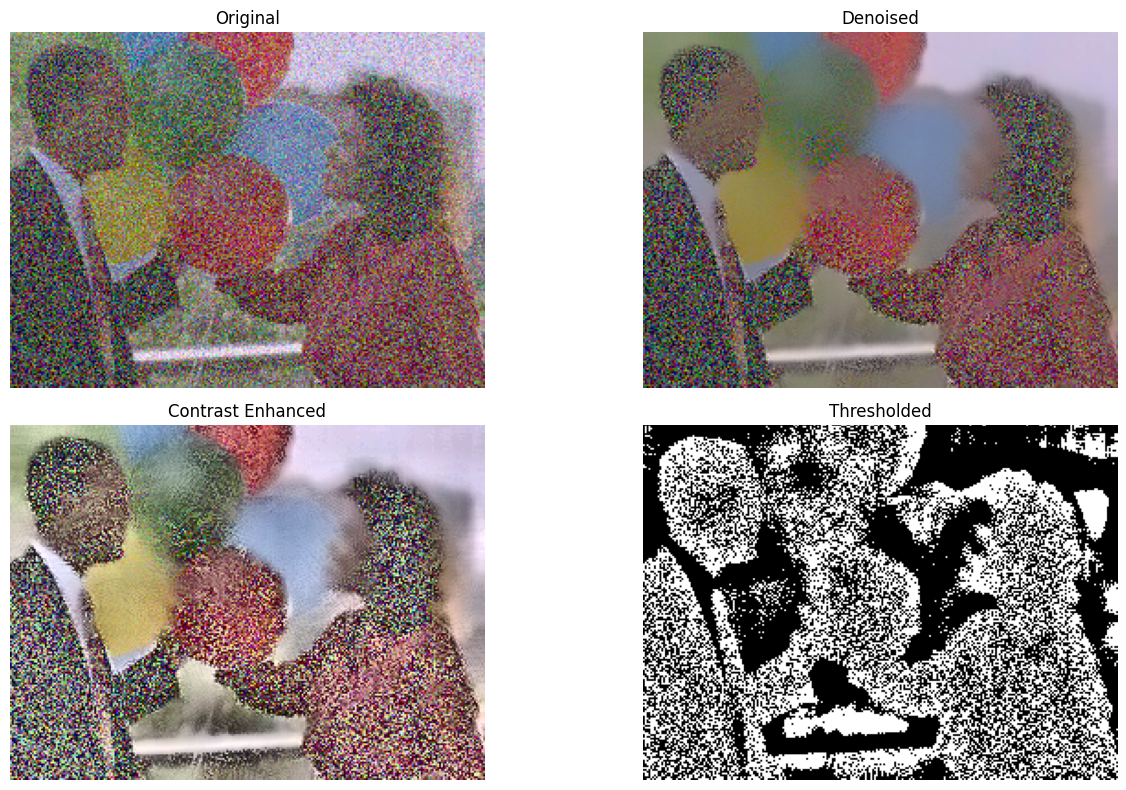

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ----------- LOAD IMAGE -----------
img_path = "/content/noisy_image_sample.jpg"
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError("Image not found.")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ----------- DENOISE -----------
denoised = cv2.fastNlMeansDenoisingColored(img, None, 15, 15, 7, 21)
denoised_rgb = cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB)

# ----------- CONTRAST ENHANCEMENT (CLAHE) -----------
lab = cv2.cvtColor(denoised, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))  # stronger contrast
cl = clahe.apply(l)

enhanced_lab = cv2.merge((cl, a, b))
enhanced = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)
enhanced_rgb = cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)

# ----------- THRESHOLDING (CLEARER) -----------
gray = cv2.cvtColor(enhanced, cv2.COLOR_BGR2GRAY)

thresh = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV,
    31,   # bigger window = smoother
    3
)

# ----------- DISPLAY -----------
plt.figure(figsize=(14, 8))

titles = ["Original", "Denoised", "Contrast Enhanced", "Thresholded"]
images = [img_rgb, denoised_rgb, enhanced_rgb, thresh]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(titles[i])
    if i < 3:
        plt.imshow(images[i])
    else:
        plt.imshow(images[i], cmap="gray")
    plt.axis("off")

plt.tight_layout()
plt.show()


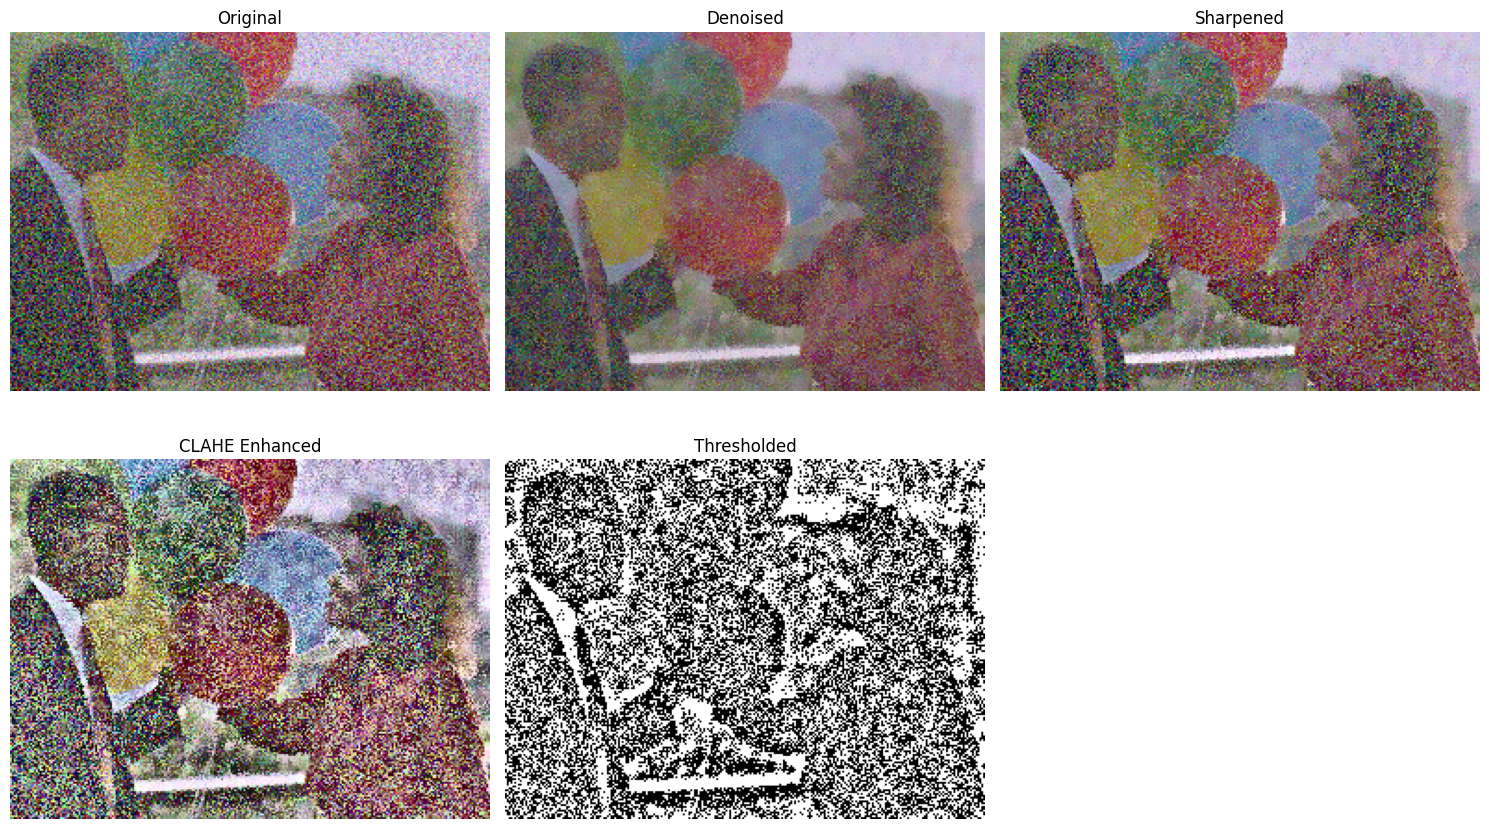

True

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1. LOAD IMAGE
# -------------------------
img_path = "/content/noisy_image_sample.jpg"
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError("Image not found. Check the file path.")

# Convert to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# -------------------------
# 2. DENOISING (Bilateral filter keeps edges sharp)
# -------------------------
denoised = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
denoised_rgb = cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB)

# -------------------------
# 3. SHARPENING (Unsharp Masking)
# -------------------------
gaussian = cv2.GaussianBlur(denoised, (9, 9), 10.0)
sharpened = cv2.addWeighted(denoised, 1.7, gaussian, -0.7, 0)
sharpened_rgb = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)

# -------------------------
# 4. CONTRAST ENHANCEMENT (CLAHE)
# -------------------------
lab = cv2.cvtColor(sharpened, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
cl = clahe.apply(l)

enhanced = cv2.cvtColor(cv2.merge((cl, a, b)), cv2.COLOR_LAB2BGR)
enhanced_rgb = cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)

# -------------------------
# 5. THRESHOLDING (cleaner)
# -------------------------
gray = cv2.cvtColor(enhanced, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    35, 8
)

# -------------------------
# 6. DISPLAY RESULTS
# -------------------------
plt.figure(figsize=(15, 9))

titles = ["Original", "Denoised", "Sharpened", "CLAHE Enhanced", "Thresholded"]
images = [img_rgb, denoised_rgb, sharpened_rgb, enhanced_rgb, thresh]

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.title(titles[i])
    if i < 4:
        plt.imshow(images[i])
    else:
        plt.imshow(images[i], cmap="gray")
    plt.axis("off")

plt.tight_layout()
plt.show()

# Optional save
cv2.imwrite("/content/output_sharpened.jpg", sharpened)
cv2.imwrite("/content/output_threshold.jpg", thresh)


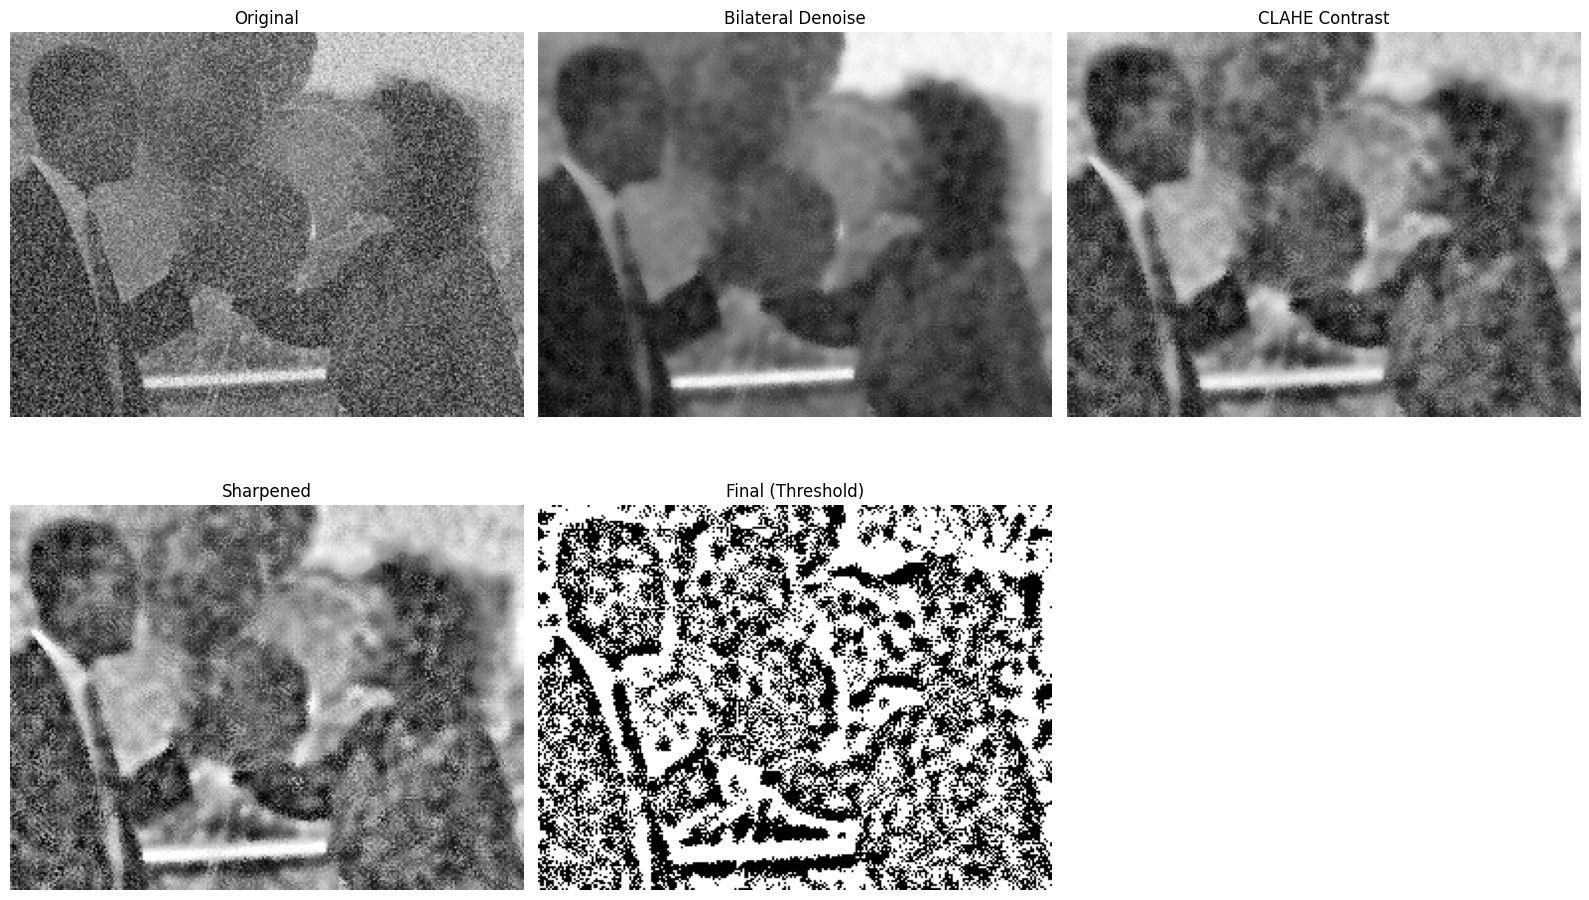

In [ ]:
import cv2
import matplotlib.pyplot as plt

# ===============================
# 1. LOAD IMAGE (Color + Gray)
# ===============================
img_path = "/content/noisy_image_sample.jpg"
img = cv2.imread(img_path)

if img is None:
    raise FileNotFoundError("Image not found. Check img_path.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ===============================
# 2. NOISE REDUCTION (3 Methods)
# ===============================

# Gaussian Blur -> reduces Gaussian noise (general smoothing)
gaussian = cv2.GaussianBlur(gray, (5,5), 0)

# Median Filtering -> best for salt & pepper noise (removes specs)
median = cv2.medianBlur(gray, 5)

# Bilateral Filtering -> denoises AND keeps edges sharp
bilateral = cv2.bilateralFilter(gray, 9, 75, 75)

# ===============================
# 3. CONTRAST ENHANCEMENT (CLAHE)
# ===============================
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_img = clahe.apply(bilateral)   # <-- apply to sharpened noiseless version

# ===============================
# 4. SHARPENING (fix blur problem)
# ===============================
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
sharp = cv2.addWeighted(clahe_img, 1.7, cv2.GaussianBlur(clahe_img, (0,0), 3), -0.7, 0)

# ===============================
# 5. THRESHOLDING (for OCR ready)
# ===============================

# Adaptive Thresholding (best for uneven lighting)
adaptive = cv2.adaptiveThreshold(
    sharp, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    31, 5
)

# ===============================
# 6. DISPLAY RESULTS
# ===============================
titles = ["Original", "Bilateral Denoise", "CLAHE Contrast", "Sharpened", "Final (Threshold)"]
images = [gray, bilateral, clahe_img, sharp, adaptive]

plt.figure(figsize=(16, 10))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()
